# COVID by State, colored per CDC foreign travel advisory map

On the CDC page https://www.cdc.gov/coronavirus/2019-ncov/travelers/map-and-travel-notices.html the CDC communicates foreign travel advisories on a map like this

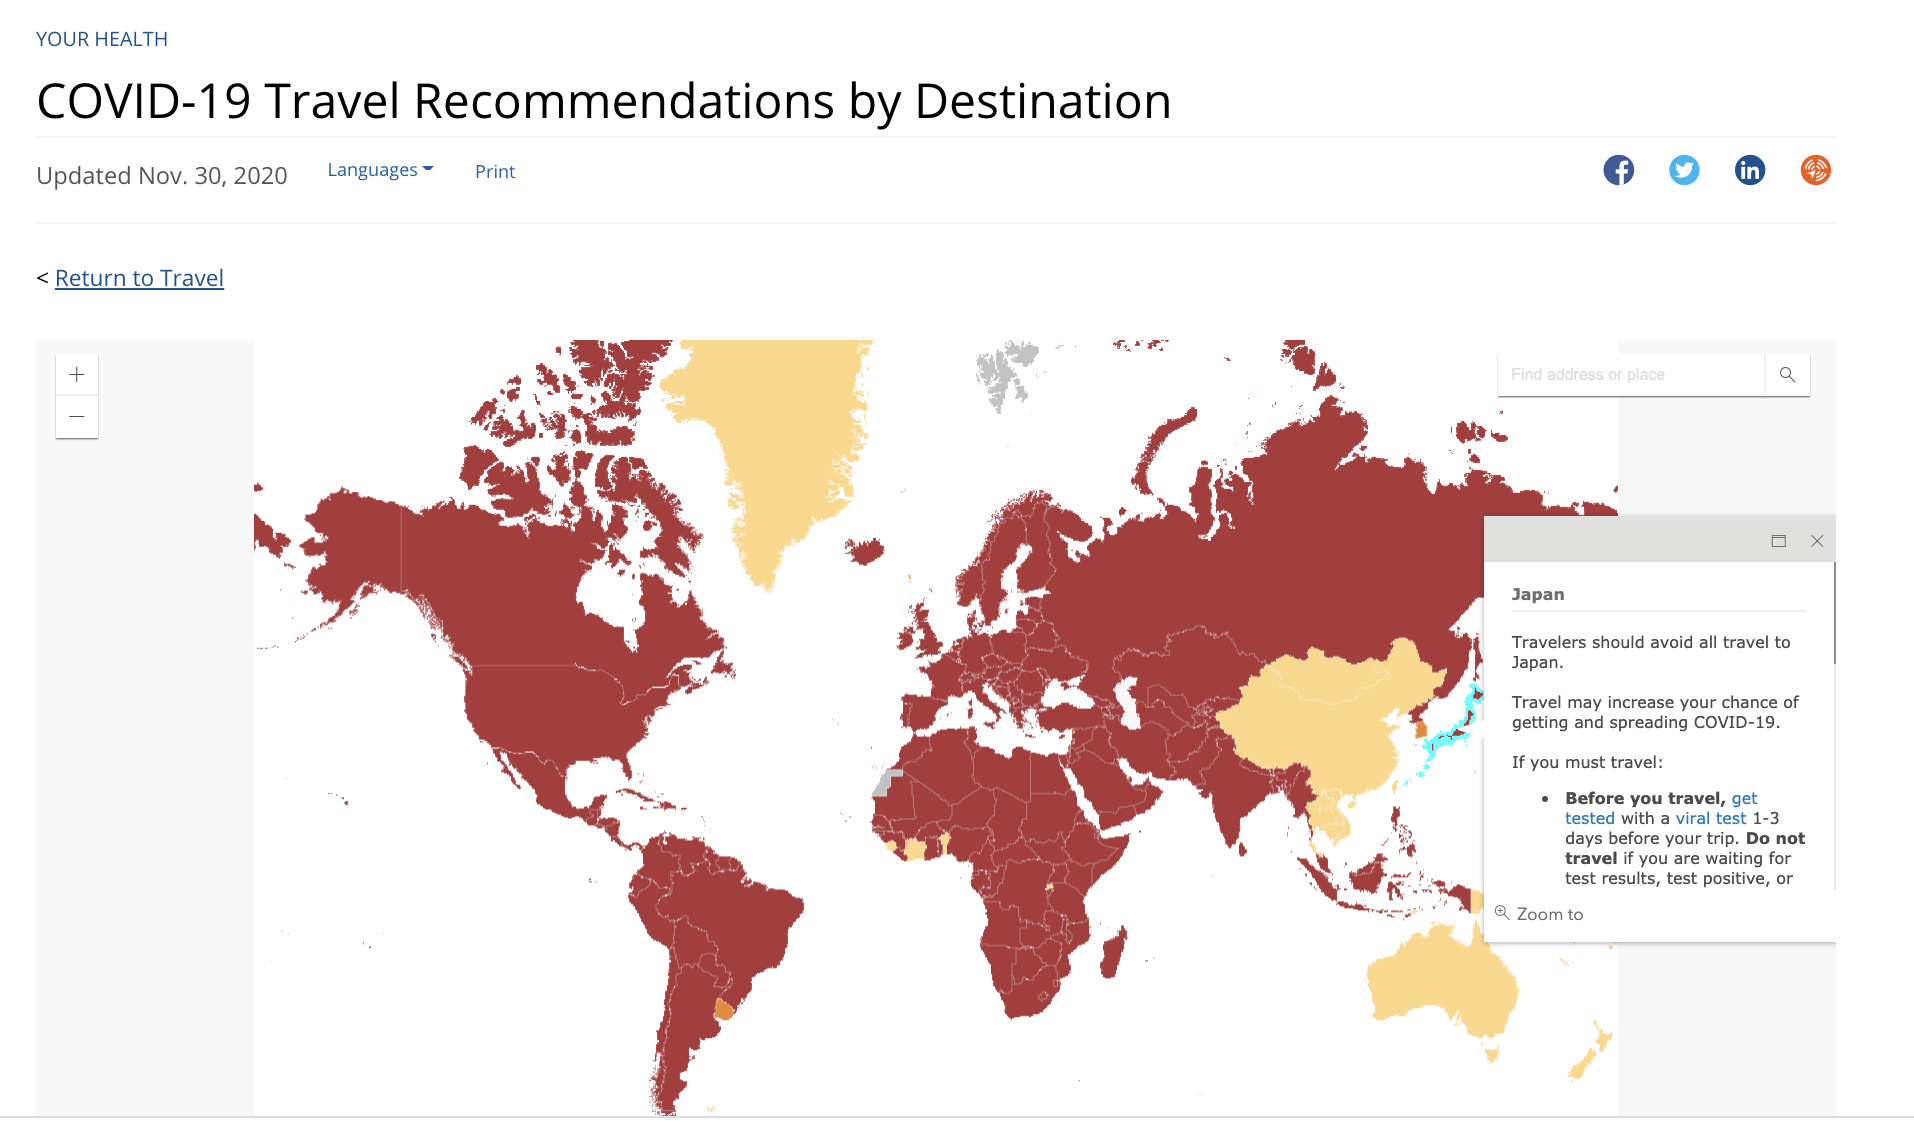

But on the US page, the CDC uses cooler, calmer colors, with 4x higher thresholds to make a map like this:

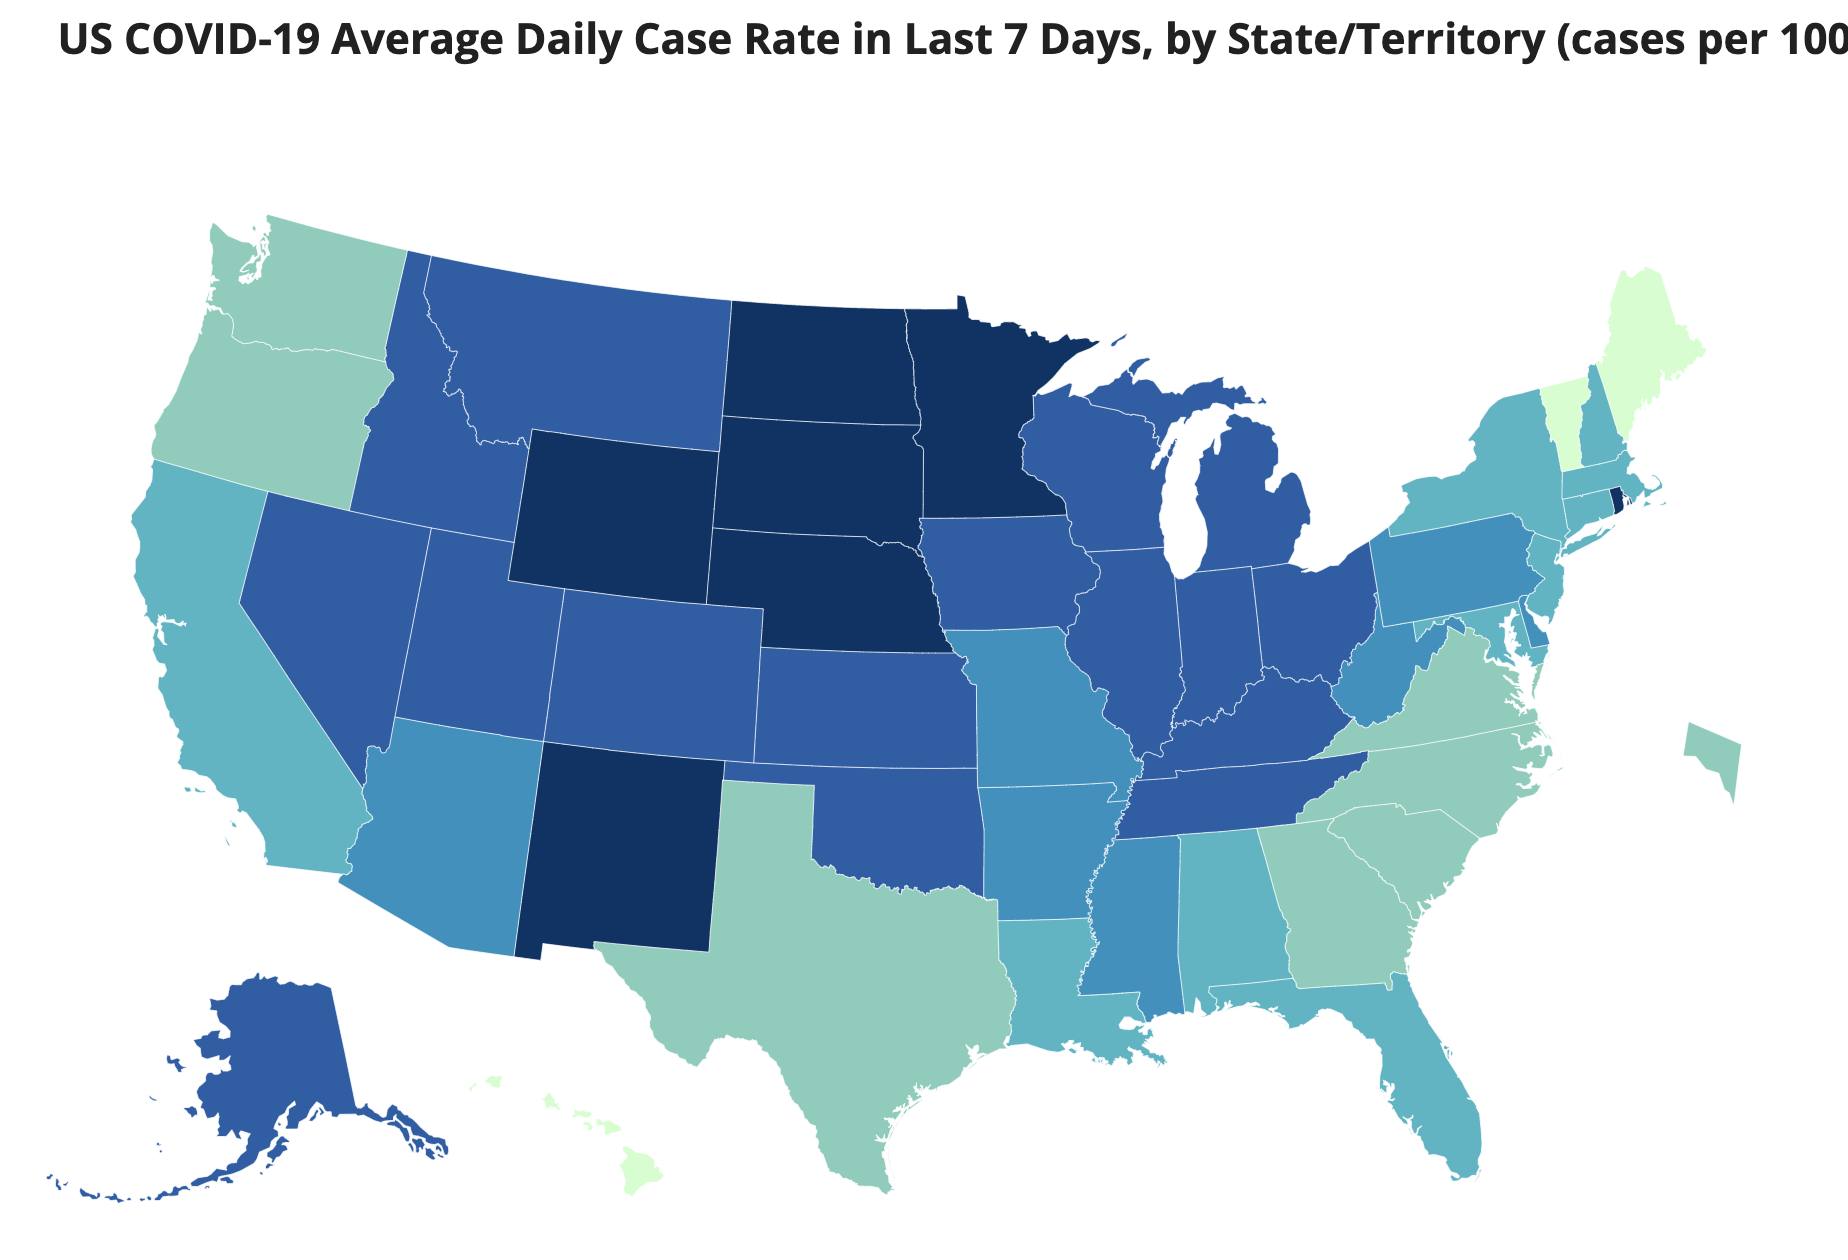

I'm curious how the foreign travel advisory thresholds would look for a US Map.

Based on https://www.cdc.gov/coronavirus/2019-ncov/travelers/how-level-is-determined.html the color scheme is now:

* Dark Red: Very High,  >500cases/28days/100kpop -- Travelers should avoid all travel...
* Dark Orange: High, >100cases/28days/100kpop -- Travelers should avoid all nonessential travel...
* Light Orange: Moderate, >50cases/28days/100kpop -- Travelers at increased risk for severe illness from COVID-19 should avoid all nonessential travel...
* Yellow: Low, <50cases/28days/100kpop -- All travelers should wear a mask, stay at least 6 feet from people who are not from your household, wash your hands often or use hand sanitizer, and watch your health for signs of illness.

I was successful, and I have posted this notebook on Github at https://github.com/drf5n/YCSD_covid_metrics/blob/master/CovidStates.ipynb with the map published on https://drf5n.github.io/ and https://drf5n.github.io/us_covid_states_map.html  It looks like this:

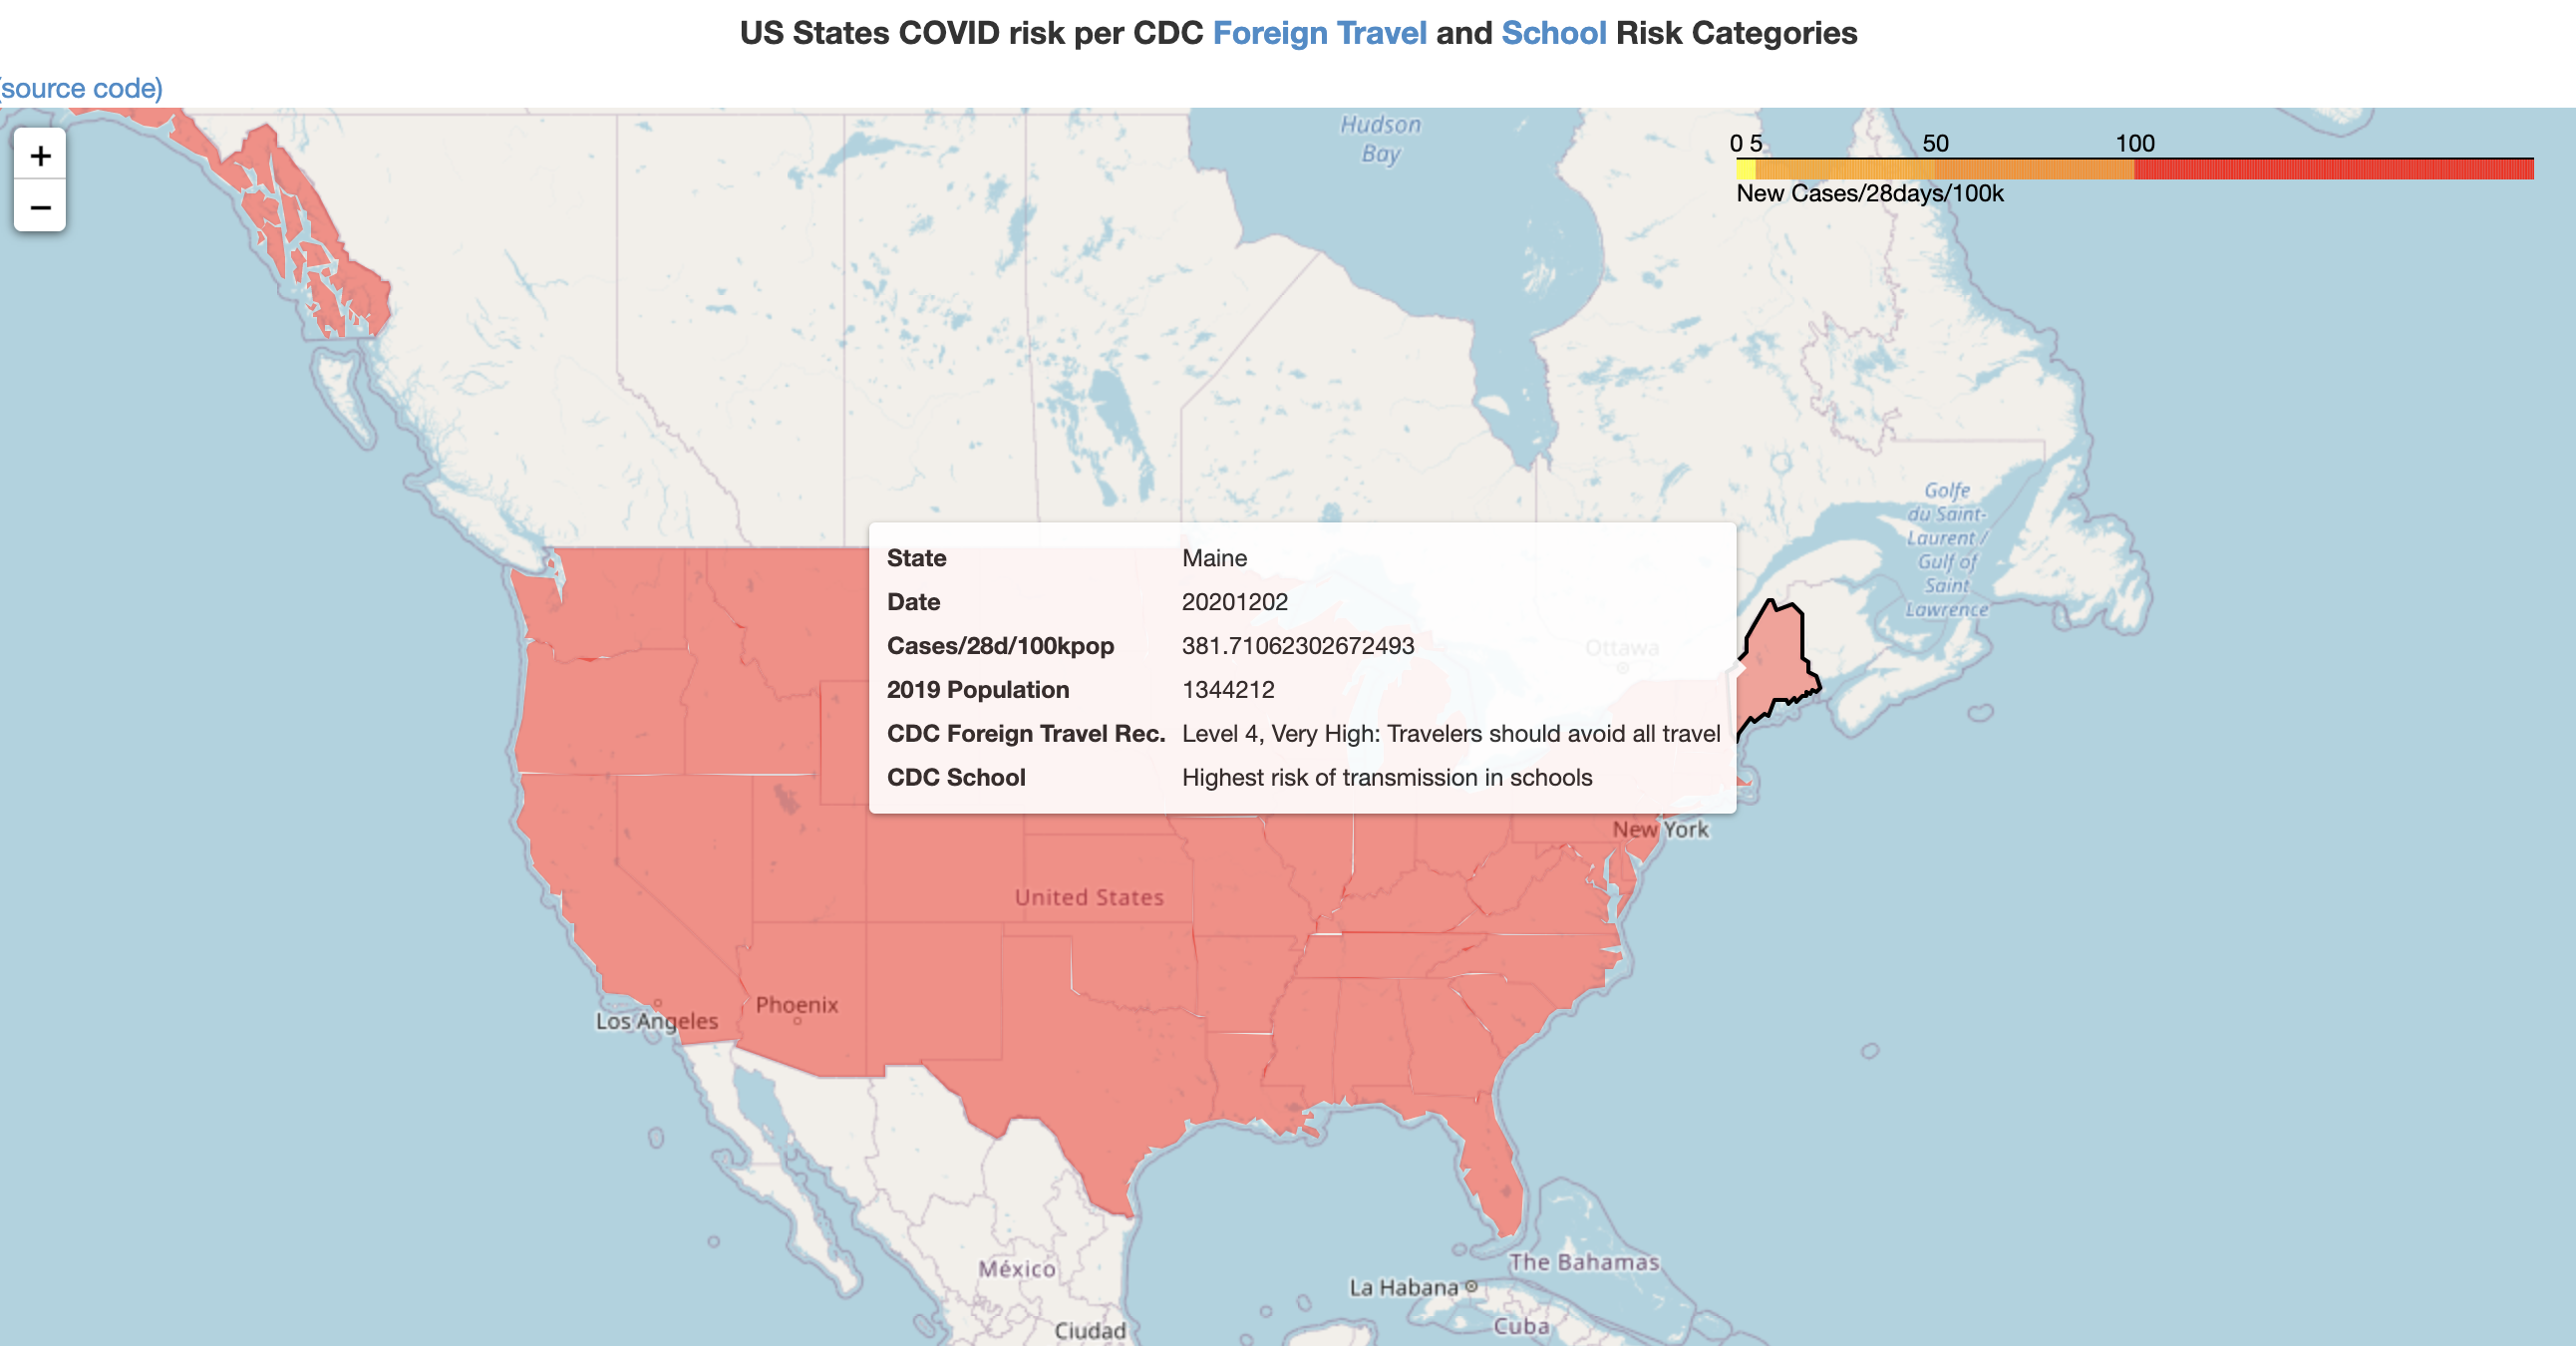

Every single state in the US is above the 500cases/28days/100kpop level of COVID transmission that, for CDC foreign travel advisories, is in the "Level 4, Very High: Travelers should avoid all travel" range.  

The community/school transmission risk criteria is 20% more strict, with a the highest risk level allowing 1/5 the cases in 1/4 the time: 100cases/7days/100kpop.

-- drf 2022-01-18

In [1]:
import os,geopandas, folium,datetime
import branca # for a colorscale
import pandas as pd

In [2]:
# Downloaded state data from https://github.com/python-visualization/folium/blob/master/examples/data/us-states.json

state_json=os.path.join('/Users/drf/Downloads/', 'us-states.json')

if not os.path.exists(state_json):
    ! wget -O "$state_json" https://github.com/python-visualization/folium/blob/master/examples/data/us-states.json

state = geopandas.read_file(state_json)

In [3]:
# #downloaded population data from Census https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/state/detail/
# or https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/state/detail/SCPRC-EST2019-18+POP-RES.csv
census_pop_state_file=os.path.join('/Users/drf/Downloads/', 'SCPRC-EST2019-18+POP-RES.csv')

if not os.path.exists(census_pop_state_file):
    ! wget -O "$census_pop_state_file" https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/state/detail/SCPRC-EST2019-18+POP-RES.csv

pops = pd.read_csv(census_pop_state_file)
#display(pops)

In [4]:
# map 2-letter codes to population data using https://github.com/drf5n/fips-codes/blob/patch-1/state_fips_master.csv modded from 
# https://github.com/kjhealy/fips-codes/blob/master/state_fips_master.csv
statemaster = pd.read_csv('https://raw.githubusercontent.com/drf5n/fips-codes/patch-1/state_fips_master.csv')
pop_augment = pops.set_index('STATE').join(statemaster.set_index('state')['state_abbr']).reset_index()
display(pop_augment)

,STATE,SUMLEV,REGION,DIVISION,NAME,POPESTIMATE2019,POPEST18PLUS2019,PCNT_POPEST18PLUS,state_abbr
0,0,10,0,0,United States,328239523,255200373,77.7,NaN
1,1,40,3,6,Alabama,4903185,3814879,77.8,AL
2,2,40,4,9,Alaska,731545,551562,75.4,AK
3,4,40,4,8,Arizona,7278717,5638481,77.5,AZ
4,5,40,3,7,Arkansas,3017804,2317649,76.8,AR
5,6,40,4,9,California,39512223,30617582,77.5,CA
6,8,40,4,8,Colorado,5758736,4499217,78.1,CO
7,9,40,1,1,Connecticut,3565287,2837847,79.6,CT
8,10,40,3,5,Delaware,973764,770192,79.1,DE
9,11,40,3,5,District of Columbia,705749,577581,81.8,DC


In [5]:
# Download the state-level covid case histories from... and try to make a dfy from the last data 


state_source = "CDC"


if state_source == "CovidTracking":
    covids = pd.read_json('https://api.covidtracking.com/v1/states/daily.json')
# Breaks after march 7 per
# https://covidtracking.com/about-data/faq#what-will-happen-to-your-apidata-after-march-7 
# CovidTracking suggests https://healthdata.gov/dataset/covid-19-diagnostic-laboratory-testing-pcr-testing-time-series
# which in turn suggests: https://beta.healthdata.gov/dataset/COVID-19-Diagnostic-Laboratory-Testing-PCR-Testing/j8mb-icvb
# This new schema is a bit different

    #covids["date"] = pd.to_datetime(covids['date'])
    display(covids)
    df = covids.sort_values(by=['state', 'date'])
    display(df)
    
    lastdate = int(covids.tail(1).date) # last day in file
    #doi = lastdate # (bad as updates happen)
    doi = int((datetime.datetime.now()-datetime.timedelta(days = 1)
         ).strftime("%Y%m%d"))  # yesterday morning as an int
    display(doi)

    df['TC_diff']= df.groupby('state')['positive'].diff().fillna(0) 
    df['TC_sum14']= df.groupby('state')['positive'].diff(14).fillna(0)
    df['TC_sum28']= df.groupby('state')['positive'].diff(28).fillna(0)
    dfy = df[df['date']==doi].copy()

elif  state_source == "CDC":
    # 4 day lag seems to work
    url = 'https://beta.healthdata.gov/api/views/j8mb-icvb/rows.csv?accessType=DOWNLOAD&api_foundry=true'
    print(f"State COVID Data from {state_source}: {url}")
    #covids = pd.read_json('https://beta.healthdata.gov/resource/j8mb-icvb.json')
    covids = pd.read_csv(url)
    covids["date"] = pd.to_datetime(covids['date'])
    lastdate = covids.tail(1).date # last day in file
    df = covids[covids["overall_outcome"]=="Positive"].sort_values(by=['state', 'date'])
    doi = (datetime.datetime.now()-datetime.timedelta(days = 5)
         ).strftime("%Y%m%d")  # yesterday morning as an int
    display(doi, lastdate)
    df['TC_diff']= df.groupby('state')['total_results_reported'].diff().fillna(0) 
    df['TC_sum7']= df.groupby('state')['total_results_reported'].diff(7).fillna(0)
    df['TC_sum14']= df.groupby('state')['total_results_reported'].diff(14).fillna(0)
    df['TC_sum28']= df.groupby('state')['total_results_reported'].diff(28).fillna(0)
    dfy = df[df['date']==doi].copy()

    
    display(dfy)
else:
    print(f"No state daily data for {state_source}")



print(dfy.shape)


State COVID Data from CDC: https://beta.healthdata.gov/api/views/j8mb-icvb/rows.csv?accessType=DOWNLOAD&api_foundry=true


'20220114'

111479   2022-01-16
Name: date, dtype: datetime64[ns]

,state,state_name,state_fips,fema_region,overall_outcome,date,new_results_reported,total_results_reported,geocoded_state,TC_diff,TC_sum7,TC_sum14,TC_sum28
4069,AK,Alaska,2,Region 10,Positive,2022-01-14,314,159079,NaN,314.0,2655.0,4254.0,4926.0
2042,AL,Alabama,1,Region 4,Positive,2022-01-14,2684,907864,NaN,2684.0,20423.0,62526.0,99301.0
8108,AR,Arkansas,5,Region 6,Positive,2022-01-14,5975,415322,NaN,5975.0,36715.0,62377.0,80490.0
6099,AZ,Arizona,4,Region 9,Positive,2022-01-14,13917,1605445,NaN,13917.0,114529.0,190987.0,251400.0
12195,CO,Colorado,8,Region 8,Positive,2022-01-14,17548,1185722,NaN,17548.0,107458.0,205963.0,299347.0
18267,DC,District of Columbia,11,Region 3,Positive,2022-01-14,1906,190629,NaN,1906.0,16912.0,37695.0,84250.0
16248,DE,Delaware,10,Region 3,Positive,2022-01-14,2276,250217,NaN,2276.0,18310.0,41022.0,63020.0
20322,FL,Florida,12,Region 4,Positive,2022-01-14,25445,5835408,NaN,25445.0,321199.0,796652.0,1379907.0
22370,GA,Georgia,13,Region 4,Positive,2022-01-14,2460,1607529,NaN,2460.0,55825.0,140620.0,310335.0
24215,GU,Guam,66,Region 9,Positive,2022-01-14,248,18228,NaN,248.0,1645.0,2145.0,2295.0


(48, 13)


In [6]:
# How fast does the data come in?
df.groupby(['date'])['state'].count()

date
2020-03-01     7
2020-03-02    11
2020-03-03    14
2020-03-04    18
2020-03-05    22
              ..
2022-01-12    52
2022-01-13    50
2022-01-14    48
2022-01-15    45
2022-01-16    40
Name: state, Length: 687, dtype: int64

In [7]:

display("DFY:",dfy)

dfya = dfy.set_index('state').join(pop_augment.set_index('state_abbr'),lsuffix='lj').reset_index()

dfya['per100k_14daysum']=dfya['TC_sum14']*100000/dfya['POPESTIMATE2019']
dfya['per100k_28daysum']=dfya['TC_sum28']*100000/dfya['POPESTIMATE2019']
dfya['per100k_7daysum']=dfya['TC_sum7']*100000/dfya['POPESTIMATE2019']
dfya['per100k_1daysum']=dfya['TC_diff']*100000/dfya['POPESTIMATE2019']
display(dfya.columns)

display(dfya[['state','date','per100k_1daysum','per100k_14daysum', 'per100k_28daysum']])

dfya['foreign']= pd.cut(dfya['per100k_28daysum'],
                       bins=[-1,50,100,500,50000],
                       labels=['Level 1, Low:  All travelers should wear a mask, stay at least 6 feet from people who are not from your household, wash your hands often or use hand sanitizer, and watch your health for signs of illness.',
                                'Level 2, Moderate: Travelers at increased risk for severe illness from COVID-19 should avoid all nonessential travel.',
                                'Level 3, High: Travelers should avoid all nonessential travel',
                                'Level 4, Very High: Travelers should avoid all travel',
                              ]).astype(str)
dfya['school']= pd.cut(dfya['per100k_7daysum'],
                       bins=[-1,10,50,100,50000],
                       labels=[
                                'Lower risk of transmission',
                                'Moderate risk of transmission',
                                'Higher risk of transmission',
                                'Highest risk of transmission',
                              ]).astype(str)


display(dfya.head())

file_state_covid='USCovidStates.geojson'
gjson = state.set_index('id').join(dfya[['state','date','new_results_reported','POPESTIMATE2019','per100k_1daysum','per100k_7daysum', 'per100k_28daysum','foreign','school']].set_index('state'))
gjson.to_file(file_state_covid, driver='GeoJSON')
display(gjson.head())

'DFY:'

,state,state_name,state_fips,fema_region,overall_outcome,date,new_results_reported,total_results_reported,geocoded_state,TC_diff,TC_sum7,TC_sum14,TC_sum28
4069,AK,Alaska,2,Region 10,Positive,2022-01-14,314,159079,NaN,314.0,2655.0,4254.0,4926.0
2042,AL,Alabama,1,Region 4,Positive,2022-01-14,2684,907864,NaN,2684.0,20423.0,62526.0,99301.0
8108,AR,Arkansas,5,Region 6,Positive,2022-01-14,5975,415322,NaN,5975.0,36715.0,62377.0,80490.0
6099,AZ,Arizona,4,Region 9,Positive,2022-01-14,13917,1605445,NaN,13917.0,114529.0,190987.0,251400.0
12195,CO,Colorado,8,Region 8,Positive,2022-01-14,17548,1185722,NaN,17548.0,107458.0,205963.0,299347.0
18267,DC,District of Columbia,11,Region 3,Positive,2022-01-14,1906,190629,NaN,1906.0,16912.0,37695.0,84250.0
16248,DE,Delaware,10,Region 3,Positive,2022-01-14,2276,250217,NaN,2276.0,18310.0,41022.0,63020.0
20322,FL,Florida,12,Region 4,Positive,2022-01-14,25445,5835408,NaN,25445.0,321199.0,796652.0,1379907.0
22370,GA,Georgia,13,Region 4,Positive,2022-01-14,2460,1607529,NaN,2460.0,55825.0,140620.0,310335.0
24215,GU,Guam,66,Region 9,Positive,2022-01-14,248,18228,NaN,248.0,1645.0,2145.0,2295.0


Index(['state', 'state_name', 'state_fips', 'fema_region', 'overall_outcome',
       'date', 'new_results_reported', 'total_results_reported',
       'geocoded_state', 'TC_diff', 'TC_sum7', 'TC_sum14', 'TC_sum28', 'STATE',
       'SUMLEV', 'REGION', 'DIVISION', 'NAME', 'POPESTIMATE2019',
       'POPEST18PLUS2019', 'PCNT_POPEST18PLUS', 'per100k_14daysum',
       'per100k_28daysum', 'per100k_7daysum', 'per100k_1daysum'],
      dtype='object')

,state,date,per100k_1daysum,per100k_14daysum,per100k_28daysum
0,AK,2022-01-14,42.922855,581.508998,673.369376
1,AL,2022-01-14,54.739929,1275.211929,2025.234618
2,AR,2022-01-14,197.991652,2066.966576,2667.171228
3,AZ,2022-01-14,191.201279,2623.910230,3453.905407
4,CO,2022-01-14,304.719647,3576.531378,5198.137230
5,DC,2022-01-14,270.067687,5341.134029,11937.671892
6,DE,2022-01-14,233.732198,4212.725055,6471.793987
7,FL,2022-01-14,118.471513,3709.198972,6424.824925
8,GA,2022-01-14,23.169464,1324.426841,2922.884395
9,GU,2022-01-14,NaN,NaN,NaN


,state,state_name,state_fips,fema_region,overall_outcome,date,new_results_reported,total_results_reported,geocoded_state,TC_diff,...,NAME,POPESTIMATE2019,POPEST18PLUS2019,PCNT_POPEST18PLUS,per100k_14daysum,per100k_28daysum,per100k_7daysum,per100k_1daysum,foreign,school
0,AK,Alaska,2,Region 10,Positive,2022-01-14,314,159079,NaN,314.0,...,Alaska,731545.0,551562.0,75.4,581.508998,673.369376,362.930510,42.922855,"Level 4, Very High: Travelers should avoid all...",Highest risk of transmission
1,AL,Alabama,1,Region 4,Positive,2022-01-14,2684,907864,NaN,2684.0,...,Alabama,4903185.0,3814879.0,77.8,1275.211929,2025.234618,416.525177,54.739929,"Level 4, Very High: Travelers should avoid all...",Highest risk of transmission
2,AR,Arkansas,5,Region 6,Positive,2022-01-14,5975,415322,NaN,5975.0,...,Arkansas,3017804.0,2317649.0,76.8,2066.966576,2667.171228,1216.613140,197.991652,"Level 4, Very High: Travelers should avoid all...",Highest risk of transmission
3,AZ,Arizona,4,Region 9,Positive,2022-01-14,13917,1605445,NaN,13917.0,...,Arizona,7278717.0,5638481.0,77.5,2623.910230,3453.905407,1573.477853,191.201279,"Level 4, Very High: Travelers should avoid all...",Highest risk of transmission
4,CO,Colorado,8,Region 8,Positive,2022-01-14,17548,1185722,NaN,17548.0,...,Colorado,5758736.0,4499217.0,78.1,3576.531378,5198.137230,1865.999761,304.719647,"Level 4, Very High: Travelers should avoid all...",Highest risk of transmission


,name,geometry,date,new_results_reported,POPESTIMATE2019,per100k_1daysum,per100k_7daysum,per100k_28daysum,foreign,school
id,,,,,,,,,,
AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",2022-01-14,2684.0,4903185.0,54.739929,416.525177,2025.234618,"Level 4, Very High: Travelers should avoid all...",Highest risk of transmission
AK,Alaska,"MULTIPOLYGON (((-131.60202 55.11798, -131.5691...",2022-01-14,314.0,731545.0,42.922855,362.930510,673.369376,"Level 4, Very High: Travelers should avoid all...",Highest risk of transmission
AZ,Arizona,"POLYGON ((-109.04250 37.00026, -109.04798 31.3...",2022-01-14,13917.0,7278717.0,191.201279,1573.477853,3453.905407,"Level 4, Very High: Travelers should avoid all...",Highest risk of transmission
AR,Arkansas,"POLYGON ((-94.47384 36.50186, -90.15254 36.496...",2022-01-14,5975.0,3017804.0,197.991652,1216.613140,2667.171228,"Level 4, Very High: Travelers should avoid all...",Highest risk of transmission
CA,California,"POLYGON ((-123.23326 42.00619, -122.37885 42.0...",NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Make some colorscales

# branca color names are defined in https://raw.githubusercontent.com/python-visualization/branca/master/branca/_cnames.json

colorscale = branca.colormap.linear.YlOrRd_09.scale(0, 200)
colorscale = branca.colormap.linear.YlOrRd_09.to_step(index=[0,50, 100,500, 1000])

# Foreign 50,100,500
colorscale_28 = branca.colormap.StepColormap(
    ['yellow','orange','darkorange','red','red','#440000'], 
    index=[0,50,100,500,1000,3000], caption='New Cases/28days/100k (red > 500, Very High)',vmin=0, vmax=3000,
)

# Foreign 50,100,500
colorscale_28l = branca.colormap.StepColormap(
    ['yellow','orange','darkorange','red','red','#440000'], 
    index=[0,50,100,500,510,3000], caption='New Cases/28days/100k',vmin=0, vmax=3000,
).to_linear()
colorscale_28l.caption=colorscale_28.caption

# Foreign 50,100,500 -- Nobody;s using 14 days anymore
colorscale_14 = branca.colormap.StepColormap(
    ['blue','green','yellow','orange','red','darkred','red','black'], 
    index=[0,10,50,100,500,501,1000,5000], caption='New Cases/14days/100k',vmin=0, vmax=400,
)

# Foreign 50,100,500
colorscale_1 = branca.colormap.StepColormap(
    ['blue','green','yellow','orange','red','red','red','black'], 
    index=[0,5,20,50,500,501,1000,5000], caption='New Cases/28days/100k',vmin=0, vmax=400,
)


display(colorscale_28)
display(colorscale_28l)





In [9]:
# Make a map out of it:
m = folium.Map(location=[37.9, -90], zoom_start=4)


loc = f"""{doi} US States COVID risk per CDC <a href="https://www.cdc.gov/coronavirus/2019-ncov/travelers/map-and-travel-notices.html">Foreign Travel</a> 
      and <a href="https://www.cdc.gov/coronavirus/2019-ncov/community/schools-childcare/k-12-guidance.html">School/Community</a> Risk Categories</a>"""
subt = """(Red is CDC Level 4: >500cases/28days/100k, Very High, Avoid all travel" and Black is 10x higher)"""
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             <h4 align="center" style="font-size:12px"><b>{}</b></h4>

             <a href="https://github.com/drf5n/YCSD_covid_metrics">(source code)</a>
             '''.format(loc,subt)   


display(gjson.columns)

def style_function_28(feature):
    y=feature['properties']['per100k_28daysum']
   # print(feature)
    return {
        'fillOpacity': 0.5,
        'weight': 0,
        'fillColor': '#black' if y is None else colorscale_28l(y)
    }

folium.GeoJson(
    file_state_covid,
    name='geojson',
    style_function=style_function_28,
    highlight_function=lambda x: {'weight': 2, 'color':'black', 'fillOpacity': 0.4,},
    tooltip=folium.features.GeoJsonTooltip(
        fields=['name',"date",'per100k_28daysum','per100k_7daysum',"POPESTIMATE2019",'foreign','school'],
        aliases=['State','Date','Cases/28d/100kpop','Cases/7d/100kpop','2019 Population','CDC Foreign Travel Rec.','CDC Community'],),
    
).add_to(m)
m.add_child(colorscale_28l)
m.get_root().html.add_child(folium.Element(title_html))

m.save('docs/us_covid_states_map.html')
m

Index(['name', 'geometry', 'date', 'new_results_reported', 'POPESTIMATE2019',
       'per100k_1daysum', 'per100k_7daysum', 'per100k_28daysum', 'foreign',
       'school'],
      dtype='object')